In [63]:
import pandas as pd
import requests
from io import StringIO
import random
import time
import re
import numpy as np
from bs4 import BeautifulSoup 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [134]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(data))
StandardScaler(copy=True, with_mean=True, with_std=True)
# print(scaler.mean_)
print(scaler.transform(data))
# print(scaler.transform([[2, 2]]))

    

StandardScaler(copy=True, with_mean=True, with_std=True)
[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]


In [138]:
k = []
for i in range(len(floor)):
    k.append([floor[i],price[i]])

In [141]:
scaler = StandardScaler()
print(scaler.fit(k))
print(scaler.transform(k))

StandardScaler(copy=True, with_mean=True, with_std=True)
[[ 3.78914378e+00  1.39114064e+00]
 [-5.19919889e-01 -3.11036369e-01]
 [-4.11350366e-02  6.72251885e-02]
 [-1.23809717e+00  1.37834013e-01]
 [-9.98704741e-01 -3.24485668e-01]
 [-1.23809717e+00  2.82834276e-01]
 [-9.98704741e-01  1.61790578e-01]
 [-2.80527463e-01 -3.74079961e-01]
 [-5.19919889e-01 -2.14369526e-01]
 [-7.59312315e-01  1.09254250e-01]
 [-2.80527463e-01 -4.16109023e-01]
 [-4.11350366e-02 -1.89152089e-01]
 [-5.19919889e-01 -3.82485774e-01]
 [-4.11350366e-02  6.21817011e-02]
 [ 4.37649816e-01  2.98385029e-01]
 [-7.59312315e-01 -2.23615920e-01]
 [-5.19919889e-01 -3.32050900e-01]
 [-4.11350366e-02  2.09283418e-01]
 [-9.98704741e-01 -2.26978245e-01]
 [-2.80527463e-01 -4.87558429e-01]
 [-1.23809717e+00 -1.35354890e-01]
 [-2.80527463e-01  1.14297738e-01]
 [ 1.39521952e+00  7.04385767e-01]
 [-7.59312315e-01 -8.42712289e-03]
 [-1.23809717e+00 -2.16891270e-01]
 [ 4.37649816e-01 -4.41518255e-02]
 [-4.11350366e-02 -7.23112970e-02

In [14]:
import pandas as pd
import requests
from io import StringIO
import random
import time
import re
import numpy as np

# download the file
district_code = input('請輸入區域:')
start_page = input('請輸入開始頁數:')
end_page = input('請輸入結束頁數:')
scratch_range = range(int(start_page), int(end_page) + 1)

list_n = list(scratch_range)
              
for i in scratch_range:
    try:
        url = 'http://tradeinfo.sinyi.com.tw/itemList.html?a1=' + str(district_code) + '&s2=10501_10703&p=' + str(i)
        headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
        r = requests.get(url, headers)
        print('downloading from web....')
        df = pd.read_html(StringIO(r.text))[-1]
        print('download has finished')

        # clean the data
        temp_column = []
        for j in range(len(df.columns.values)):
                    temp_column.append(df.columns.values[j].split()[0])
        df.columns = temp_column
        df['特殊'] = pd.Series(np.zeros(len(df)), index=df.index)
        for t in range(len(df)):
            df['特殊'][t] = 'None'
        for k in range(len(df)):
            if '備註' in df['年月'][k]: 
                df['特殊'][k-1] = df['年月'][k]
        df = df[df['地址'].isnull() != True]
    except AttributeError:
        print('AttributeError exception happens')
    except Exception:
        print('Unknown exception happens')
# join the data
    list_n[i-int(start_page)] = df
    print('page ' + str(i) + ' done')
    t = int(random.random() * 0) + 1
    time.sleep(t)
    
try:
    for i in range(len(list_n)):
        if type(list_n[i]) != pd.core.frame.DataFrame:
            del list_n[i]
except IndexError:
    pass

temp = pd.concat(list_n)
if 0 in temp.columns: 
    temp.drop([0, 1],axis=1,inplace=True)
temp = temp[temp['地址'].isnull() != True]
print('all pages done')
temp.to_csv('hou_%s.csv' % (district_code), index = False)
        

請輸入區域:108
請輸入開始頁數:1
請輸入結束頁數:10
downloading from web....
download has finished
page 1 done


D:\anacon\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


downloading from web....
download has finished
page 2 done
downloading from web....
download has finished
page 3 done
downloading from web....
download has finished
page 4 done
downloading from web....
download has finished
page 5 done
downloading from web....
download has finished
page 6 done
downloading from web....
download has finished
page 7 done
downloading from web....
download has finished
page 8 done
downloading from web....
download has finished
page 9 done
downloading from web....
download has finished
page 10 done
all pages done


In [195]:
d_all.to_csv('C:\\Users\\Double 8\\all.csv',index=False,encoding='utf_8_sig')

In [17]:
d_116 = pd.read_csv('C:\\Users\\Double 8\\hou_116.csv')
d_104 = pd.read_csv('C:\\Users\\Double 8\\hou_104.csv')
d_108 = pd.read_csv('C:\\Users\\Double 8\\hou_108.csv')

In [19]:
d_all = pd.concat([d_116,d_104,d_108])

In [30]:
d_116.columns

Index(['年月', '地址', '類型', '總價', '每坪單價', '建坪', '地坪', '屋齡', '樓層', '格局', '特殊'], dtype='object')

In [31]:
d_all.columns = ['year/month','address','type','price','per','building_area','ground_area','age','floor','appearance','special']

In [24]:
d_all['per'] = d_all['per'].apply(lambda x:x.split('萬')[0])

In [114]:
d_all['price'] = d_all['price'].apply(lambda x:x.split('萬')[0])
d_all['building_area'] = d_all['building_area'].apply(lambda x:x.split('坪')[0])
d_all['ground_area'] = d_all['ground_area'].apply(lambda x:x.split('坪')[0])
d_all['age'] = d_all['age'].apply(lambda x:x.split('年')[0])
d_all['floor'] = d_all['floor'].apply(lambda x:x.split(' ')[0])

In [115]:
d_all

,year/month,address,type,price,per,building_area,ground_area,age,floor,appearance,special
0,107年03月,文山區福興路106巷1~30號 檢視位置,電梯大樓/純車位 含車位,170,0,10.69,0.18,5.3,2,0房/0廳/0衛/0室 社區 敦南觀止 》,None
1,107年03月,文山區木新路三段232巷7弄1~30號 檢視位置,華廈/純車位 含車位,483,0,96.21,6.6,11,2,0房/0廳/0衛/0室 社區 松荷 》,None
2,107年03月,文山區汀州路四段181~210號 檢視位置,住宅大樓 含車位,5300,85.5,77.36,8.73,7.2,22,4房/2廳/2衛 近捷運 萬隆站 》 社區 台大緣 》,None
3,107年03月,文山區和興路26巷1~30號 檢視位置,華廈,1250,50.1,24.96,5.82,9,4,2房/1廳/1衛 社區 世新寶藏 》,備註資料： 含增建或未登記建物。（資料來源：政府實價登錄）
4,107年03月,文山區仙岩路16巷61~90號 檢視位置,住宅大樓 含車位,2150,37.6,57.12,18.96,20,6,3房/2廳/2衛 社區 麥田山莊金禾區 》,None
5,107年03月,文山區興隆路三段255巷61~90號 檢視位置,透天厝,2318,25.6,90.55,31.98,25.8,1,7房/2廳/5衛,備註資料： 地政士僅受託買賣案件申請登記，並無代理撰擬不動產買賣契約書，係由不動產經紀業或...
6,107年03月,文山區福興路82巷1~30號 檢視位置,公寓,1218,40.8,29.83,9.53,34.5,2,3房/2廳/2衛 近捷運 辛亥站 》,None
7,107年03月,文山區政大二街171巷1~30號 檢視位置,透天厝 含車位,2663,33.3,79.88,38.47,22.2,1,4房/2廳/3衛,None
8,107年03月,文山區羅斯福路五段271~300號 檢視位置,公寓,1100,50.8,21.63,6.66,--,5,2房/2廳/1衛 近捷運 萬隆站 》,備註資料： 含增建或未登記建物。（資料來源：政府實價登錄）
9,107年03月,文山區下崙路11巷1~30號 檢視位置,純車位,560,--,38.07,0.08,1.2,-2,0房/0廳/0衛,None


In [116]:
age = []
per = []
price = []
floor = []
for i in range(len(d_all)):
    if '純車位' not in d_all.iloc[i]['type'] :
        if '--' not in d_all.iloc[i]['age']:
            age.append(float(d_all.iloc[i]['age']))
            per.append((float(d_all.iloc[i]['price'])/float(d_all.iloc[i]['building_area'])))
            price.append(float(d_all.iloc[i]['price']))
            floor.append(float(d_all.iloc[i]['floor']))

In [117]:
floor

[22.0,
 4.0,
 6.0,
 1.0,
 2.0,
 1.0,
 2.0,
 5.0,
 4.0,
 3.0,
 5.0,
 6.0,
 4.0,
 6.0,
 8.0,
 3.0,
 4.0,
 6.0,
 2.0,
 5.0,
 1.0,
 5.0,
 12.0,
 3.0,
 1.0,
 8.0,
 6.0,
 7.0,
 4.0,
 8.0,
 7.0,
 10.0,
 17.0,
 3.0,
 5.0,
 8.0,
 11.0,
 7.0,
 7.0,
 10.0,
 2.0,
 7.0,
 6.0,
 5.0,
 13.0,
 3.0,
 4.0,
 9.0,
 4.0,
 7.0,
 4.0,
 4.0,
 3.0,
 4.0,
 10.0,
 1.0,
 5.0,
 6.0,
 4.0,
 4.0,
 10.0,
 10.0,
 6.0,
 2.0,
 4.0,
 4.0,
 3.0,
 18.0,
 6.0,
 13.0,
 4.0,
 11.0,
 4.0,
 6.0,
 5.0,
 7.0,
 1.0,
 1.0,
 3.0,
 16.0,
 2.0,
 10.0,
 3.0,
 1.0,
 2.0,
 2.0,
 9.0,
 2.0,
 8.0,
 3.0,
 4.0,
 1.0,
 6.0,
 6.0,
 6.0,
 1.0,
 6.0,
 7.0,
 4.0,
 9.0,
 4.0,
 5.0,
 2.0,
 10.0,
 3.0,
 5.0,
 1.0,
 14.0,
 6.0,
 5.0,
 8.0,
 4.0,
 5.0,
 4.0,
 8.0,
 7.0,
 1.0,
 1.0,
 6.0,
 1.0,
 7.0,
 12.0,
 1.0,
 1.0,
 7.0,
 4.0,
 1.0,
 5.0,
 5.0,
 5.0,
 2.0,
 11.0,
 2.0,
 6.0,
 8.0,
 3.0,
 9.0,
 7.0,
 9.0,
 5.0,
 4.0,
 12.0,
 7.0,
 6.0,
 8.0,
 5.0,
 4.0,
 2.0,
 8.0,
 2.0,
 5.0,
 6.0,
 6.0,
 4.0,
 4.0,
 12.0,
 12.0,
 4.0,
 5.0,
 1.0,
 12.0,
 9.0,
 12.0

In [181]:
target1 = []
s1 = []
s2 = []
s3 = []
for item in per:
    if item < 50.7:
        target1.append(1)
        s1.append(1)

    else:
        target1.append(3)
        s3.append(3)

In [172]:
len(s1)

178

In [173]:
len(s3)

177

In [179]:
target = []
s1 = []
s2 = []
s3 = []
for item in per:
    if item < 45:
        target.append(1)
        s1.append(1)
    elif 35 <= item < 58:
        target.append(2)
        s2.append(2)
    else:
        target.append(3)
        s3.append(3)

In [180]:
len(target)

355

In [158]:
355/2

177.5

In [109]:
len(s2)

120

In [110]:
len(s1)

120

In [111]:
len(s3)

115

In [78]:
168+168+19

355

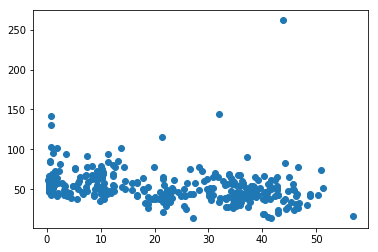

In [122]:
plt.scatter(age,per)

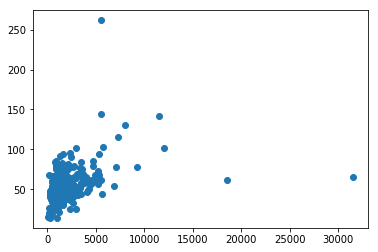

In [123]:
plt.scatter(price,per)

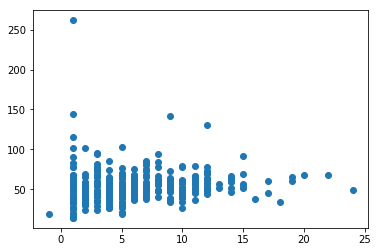

In [124]:
plt.scatter(floor,per)

In [178]:
len(target)

2130

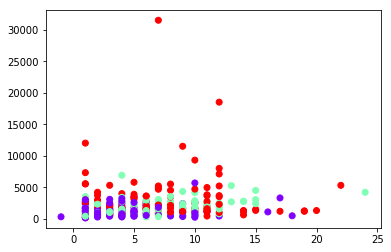

In [182]:
plt.scatter(floor,price,c=target,cmap='rainbow')

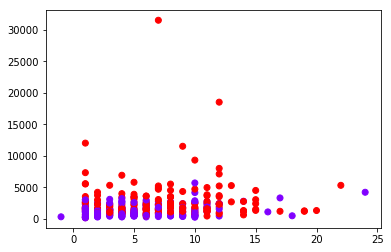

In [183]:
plt.scatter(floor,price,c=target1,cmap='rainbow')

In [152]:
scaler.transform(k)[:,0]

array([ 3.78914378, -0.51991989, -0.04113504, -1.23809717, -0.99870474,
       -1.23809717, -0.99870474, -0.28052746, -0.51991989, -0.75931231,
       -0.28052746, -0.04113504, -0.51991989, -0.04113504,  0.43764982,
       -0.75931231, -0.51991989, -0.04113504, -0.99870474, -0.28052746,
       -1.23809717, -0.28052746,  1.39521952, -0.75931231, -1.23809717,
        0.43764982, -0.04113504,  0.19825739, -0.51991989,  0.43764982,
        0.19825739,  0.91643467,  2.59218165, -0.75931231, -0.28052746,
        0.43764982,  1.15582709,  0.19825739,  0.19825739,  0.91643467,
       -0.99870474,  0.19825739, -0.04113504, -0.28052746,  1.63461195,
       -0.75931231, -0.51991989,  0.67704224, -0.51991989,  0.19825739,
       -0.51991989, -0.51991989, -0.75931231, -0.51991989,  0.91643467,
       -1.23809717, -0.28052746, -0.04113504, -0.51991989, -0.51991989,
        0.91643467,  0.91643467, -0.04113504, -0.99870474, -0.51991989,
       -0.51991989, -0.75931231,  2.83157408, -0.04113504,  1.63

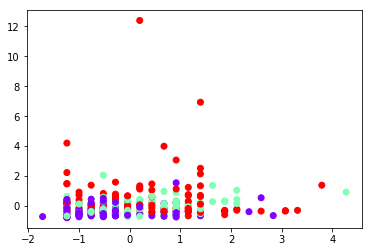

In [153]:
plt.scatter(scaler.transform(k)[:,0],scaler.transform(k)[:,1],c=target,cmap='rainbow')

In [187]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(scaler.transform(k))


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

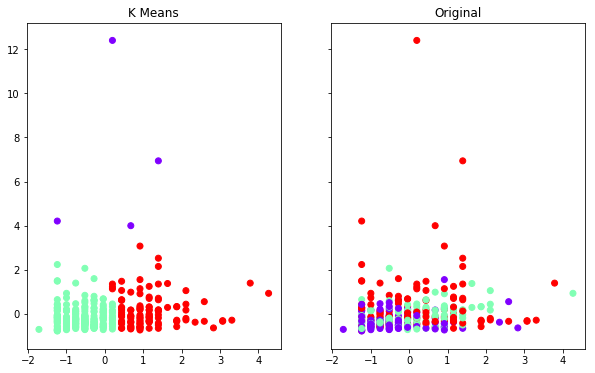

In [188]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(scaler.transform(k)[:,0],scaler.transform(k)[:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(scaler.transform(k)[:,0],scaler.transform(k)[:,1],c=target,cmap='rainbow')

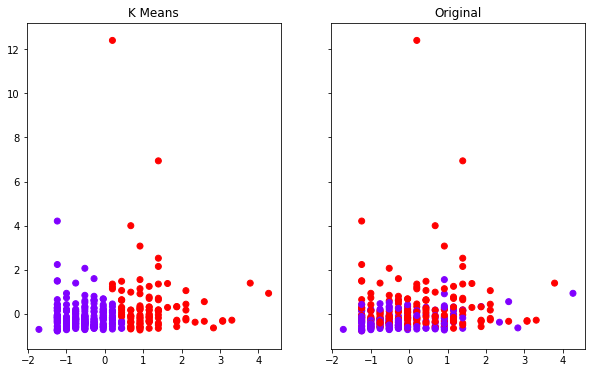

In [186]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(10,6))
ax1.set_title('K Means')
ax1.scatter(scaler.transform(k)[:,0],scaler.transform(k)[:,1],c=kmeans.labels_,cmap='rainbow')
ax2.set_title("Original")
ax2.scatter(scaler.transform(k)[:,0],scaler.transform(k)[:,1],c=target1,cmap='rainbow')

In [126]:
for i in range(len(d_all)):
    if float(d_all.iloc[i]['price'])>25000:
        print(d_all.iloc[i])

year/month                     107年03月
address          萬華區中華路一段121~150號 檢視位置
type                            辦公商業大樓
price                            31500
per                                 65
building_area                   484.73
ground_area                      76.02
age                               38.6
floor                                7
appearance          0房/0廳/0衛 近捷運 西門站 》
special                           None
Name: 4, dtype: object


In [125]:
d_all

,year/month,address,type,price,per,building_area,ground_area,age,floor,appearance,special
0,107年03月,文山區福興路106巷1~30號 檢視位置,電梯大樓/純車位 含車位,170,0,10.69,0.18,5.3,2,0房/0廳/0衛/0室 社區 敦南觀止 》,None
1,107年03月,文山區木新路三段232巷7弄1~30號 檢視位置,華廈/純車位 含車位,483,0,96.21,6.6,11,2,0房/0廳/0衛/0室 社區 松荷 》,None
2,107年03月,文山區汀州路四段181~210號 檢視位置,住宅大樓 含車位,5300,85.5,77.36,8.73,7.2,22,4房/2廳/2衛 近捷運 萬隆站 》 社區 台大緣 》,None
3,107年03月,文山區和興路26巷1~30號 檢視位置,華廈,1250,50.1,24.96,5.82,9,4,2房/1廳/1衛 社區 世新寶藏 》,備註資料： 含增建或未登記建物。（資料來源：政府實價登錄）
4,107年03月,文山區仙岩路16巷61~90號 檢視位置,住宅大樓 含車位,2150,37.6,57.12,18.96,20,6,3房/2廳/2衛 社區 麥田山莊金禾區 》,None
5,107年03月,文山區興隆路三段255巷61~90號 檢視位置,透天厝,2318,25.6,90.55,31.98,25.8,1,7房/2廳/5衛,備註資料： 地政士僅受託買賣案件申請登記，並無代理撰擬不動產買賣契約書，係由不動產經紀業或...
6,107年03月,文山區福興路82巷1~30號 檢視位置,公寓,1218,40.8,29.83,9.53,34.5,2,3房/2廳/2衛 近捷運 辛亥站 》,None
7,107年03月,文山區政大二街171巷1~30號 檢視位置,透天厝 含車位,2663,33.3,79.88,38.47,22.2,1,4房/2廳/3衛,None
8,107年03月,文山區羅斯福路五段271~300號 檢視位置,公寓,1100,50.8,21.63,6.66,--,5,2房/2廳/1衛 近捷運 萬隆站 》,備註資料： 含增建或未登記建物。（資料來源：政府實價登錄）
9,107年03月,文山區下崙路11巷1~30號 檢視位置,純車位,560,--,38.07,0.08,1.2,-2,0房/0廳/0衛,None


In [58]:
len(d_all)

450

In [59]:
len(age)

355

In [60]:
len(per)

355

In [62]:
len(price)

355

In [38]:
d_all

,year/month,address,type,price,per,building_area,ground_area,age,floor,appearance,special
0,107年03月,文山區福興路106巷1~30號 檢視位置,電梯大樓/純車位 含車位,170,0,10.69,0.18,5.3,2 /共14層,0房/0廳/0衛/0室 社區 敦南觀止 》,None
1,107年03月,文山區木新路三段232巷7弄1~30號 檢視位置,華廈/純車位 含車位,483,0,96.21,6.6,11,2 /共10層,0房/0廳/0衛/0室 社區 松荷 》,None
2,107年03月,文山區汀州路四段181~210號 檢視位置,住宅大樓 含車位,5300,85.5,77.36,8.73,7.2,22 /共22層,4房/2廳/2衛 近捷運 萬隆站 》 社區 台大緣 》,None
3,107年03月,文山區和興路26巷1~30號 檢視位置,華廈,1250,50.1,24.96,5.82,9,4 /共9層,2房/1廳/1衛 社區 世新寶藏 》,備註資料： 含增建或未登記建物。（資料來源：政府實價登錄）
4,107年03月,文山區仙岩路16巷61~90號 檢視位置,住宅大樓 含車位,2150,37.6,57.12,18.96,20,6 /共13層,3房/2廳/2衛 社區 麥田山莊金禾區 》,None
5,107年03月,文山區興隆路三段255巷61~90號 檢視位置,透天厝,2318,25.6,90.55,31.98,25.8,1 /共4層,7房/2廳/5衛,備註資料： 地政士僅受託買賣案件申請登記，並無代理撰擬不動產買賣契約書，係由不動產經紀業或...
6,107年03月,文山區福興路82巷1~30號 檢視位置,公寓,1218,40.8,29.83,9.53,34.5,2 /共5層,3房/2廳/2衛 近捷運 辛亥站 》,None
7,107年03月,文山區政大二街171巷1~30號 檢視位置,透天厝 含車位,2663,33.3,79.88,38.47,22.2,1 /共3層,4房/2廳/3衛,None
8,107年03月,文山區羅斯福路五段271~300號 檢視位置,公寓,1100,50.8,21.63,6.66,--,5 /共5層,2房/2廳/1衛 近捷運 萬隆站 》,備註資料： 含增建或未登記建物。（資料來源：政府實價登錄）
9,107年03月,文山區下崙路11巷1~30號 檢視位置,純車位,560,--,38.07,0.08,1.2,-2 /共7層,0房/0廳/0衛,None


In [27]:
per = []
for item in d_all['per'].tolist():
    

'0'